EVYD TECHNOLOGY PROBLEM STATEMENT:
Type 2 diabetes mellitus (T2DM) stands as a towering challenge in the realm of global health, its prevalence soaring as one of today’s most widespread noncommunicable diseases (NCDs). At the heart of T2DM lies a complex web of lifestyle choices—what we eat, how much we move, and even how we rest. These choices weave together to form patterns that can significantly elevate the risk of developing this life-altering condition.

The challenge:

Your task is to dive deep into this data and emerge with insights that illuminate the personas at high risk for T2DM. A “persona” here is not just a statistic but a richly detailed portrait composed of lifestyle attributes: demographics, health behaviours, and overall health status.

Objectives:

• Data exploration: Analyse the dataset to identify key factors and patterns that correlate with an increased risk of T2DM.
• Persona creation: Synthesise your findings to construct detailed personas—comprehensive profiles embodying the lifestyle attributes that signal a higher risk of T2DM.
• Insight generation: Provide actionable insights based on the personas identified. How can these insights inform public health strategies, personalised interventions, and awareness campaigns to combat T2DM?

Some guiding questions:

What combinations of lifestyle attributes (e.g., diet, physical activity, sleep patterns) are most commonly associated with a high risk of T2DM?
How do demographic factors (such as age, gender, socioeconomic status, and geographic location) intersect with lifestyle choices to influence T2DM risk?
In what ways can understanding these personas inform more targeted and effective interventions for preventing T2DM?
How might this persona-based approach contribute to public health policies and personal health practices?


Name: Anggi Novitasari
Email: angginovitasari.id@gmail.com

# I. ENVIRONMENT AND DATA PREPARATION

In [1]:
!pip install virtualenv
!virtualenv cwb
!source cwb/bin/activate
!pip install scikit-learn==1.4.2

created virtual environment CPython3.11.4.final.0-64 in 19229ms
  creator CPython3Windows(dest=C:\Users\Administrator\Downloads\cwb, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=C:\Users\Administrator\AppData\Local\pypa\virtualenv)
    added seed packages: pip==24.0, setuptools==69.5.1, wheel==0.43.0
  activators BashActivator,BatchActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


'source' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from joblib import dump, load

In [3]:
# Load the dataset
url1 = "https://raw.githubusercontent.com/Ngno/CWB/main/diabetes_012_health_indicators_BRFSS2015.csv"
url2 = "https://raw.githubusercontent.com/Ngno/CWB/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
url3 = "https://raw.githubusercontent.com/Ngno/CWB/main/diabetes_binary_health_indicators_BRFSS2015.csv"
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

In [4]:
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
print(df1['Diabetes_012'].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [7]:
# Transform the Diabetes_012 column
df1['Diabetes_binary'] = df1['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1).astype(float)
df1.drop(columns=['Diabetes_012'], inplace=True)
print(df1['Diabetes_binary'].value_counts())

Diabetes_binary
0.0    213703
1.0     39977
Name: count, dtype: int64


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

In [9]:
df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [11]:
print(df2['Diabetes_binary'].value_counts())

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


In [12]:
df3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [14]:
print(df3['Diabetes_binary'].value_counts())

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


In [15]:
# Rearrange columns to match the structure of df2 and df3
df1 = df1[['Diabetes_binary','HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
           'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
           'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]

In [16]:
# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Display the first few rows of the merged dataset
merged_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# II. DATA EXPLORATION

In [17]:
print(merged_df['Diabetes_binary'].value_counts())

Diabetes_binary
0.0    467383
1.0    110669
Name: count, dtype: int64


In [18]:
# Get unique values for each column
unique_values = {column: merged_df[column].unique().tolist() for column in merged_df.columns}

# Display the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in '{column}':")
    print(values)
    print("\n")

Unique values in 'Diabetes_binary':
[0.0, 1.0]


Unique values in 'HighBP':
[1.0, 0.0]


Unique values in 'HighChol':
[1.0, 0.0]


Unique values in 'CholCheck':
[1.0, 0.0]


Unique values in 'BMI':
[40.0, 25.0, 28.0, 27.0, 24.0, 30.0, 34.0, 26.0, 33.0, 21.0, 23.0, 22.0, 38.0, 32.0, 37.0, 31.0, 29.0, 20.0, 35.0, 45.0, 39.0, 19.0, 47.0, 18.0, 36.0, 43.0, 55.0, 49.0, 42.0, 17.0, 16.0, 41.0, 44.0, 50.0, 59.0, 48.0, 52.0, 46.0, 54.0, 57.0, 53.0, 14.0, 15.0, 51.0, 58.0, 63.0, 61.0, 56.0, 74.0, 62.0, 64.0, 66.0, 73.0, 85.0, 60.0, 67.0, 65.0, 70.0, 82.0, 79.0, 92.0, 68.0, 72.0, 88.0, 96.0, 13.0, 81.0, 71.0, 75.0, 12.0, 77.0, 69.0, 76.0, 87.0, 89.0, 84.0, 95.0, 98.0, 91.0, 86.0, 83.0, 80.0, 90.0, 78.0]


Unique values in 'Smoker':
[1.0, 0.0]


Unique values in 'Stroke':
[0.0, 1.0]


Unique values in 'HeartDiseaseorAttack':
[0.0, 1.0]


Unique values in 'PhysActivity':
[0.0, 1.0]


Unique values in 'Fruits':
[0.0, 1.0]


Unique values in 'Veggies':
[1.0, 0.0]


Unique values in 'HvyAlcoholConsum

In [19]:
# Get the count of each unique BMI value
bmi_counts = merged_df['BMI'].value_counts()
print(bmi_counts.to_string())

BMI
27.0    55539
26.0    46099
24.0    43492
25.0    38323
28.0    37673
23.0    34535
29.0    33999
30.0    33490
22.0    30064
31.0    28303
32.0    24429
21.0    21738
33.0    21055
34.0    16926
20.0    13910
35.0    13257
36.0    11060
37.0     9901
19.0     8627
38.0     8209
39.0     7011
40.0     5486
41.0     4019
18.0     3972
42.0     3964
43.0     3665
44.0     2542
45.0     2011
46.0     1859
17.0     1722
47.0     1516
48.0     1204
49.0     1027
50.0      939
16.0      766
51.0      628
53.0      583
52.0      541
55.0      417
15.0      294
54.0      283
56.0      268
57.0      209
58.0      186
60.0      155
79.0      149
87.0      135
59.0      133
77.0      128
75.0      113
71.0      107
81.0      107
73.0      106
62.0      104
84.0      101
61.0       90
14.0       90
63.0       88
82.0       85
92.0       73
89.0       60
64.0       57
13.0       50
65.0       49
67.0       38
72.0       37
68.0       35
70.0       35
66.0       35
74.0       33
95.0       28
69

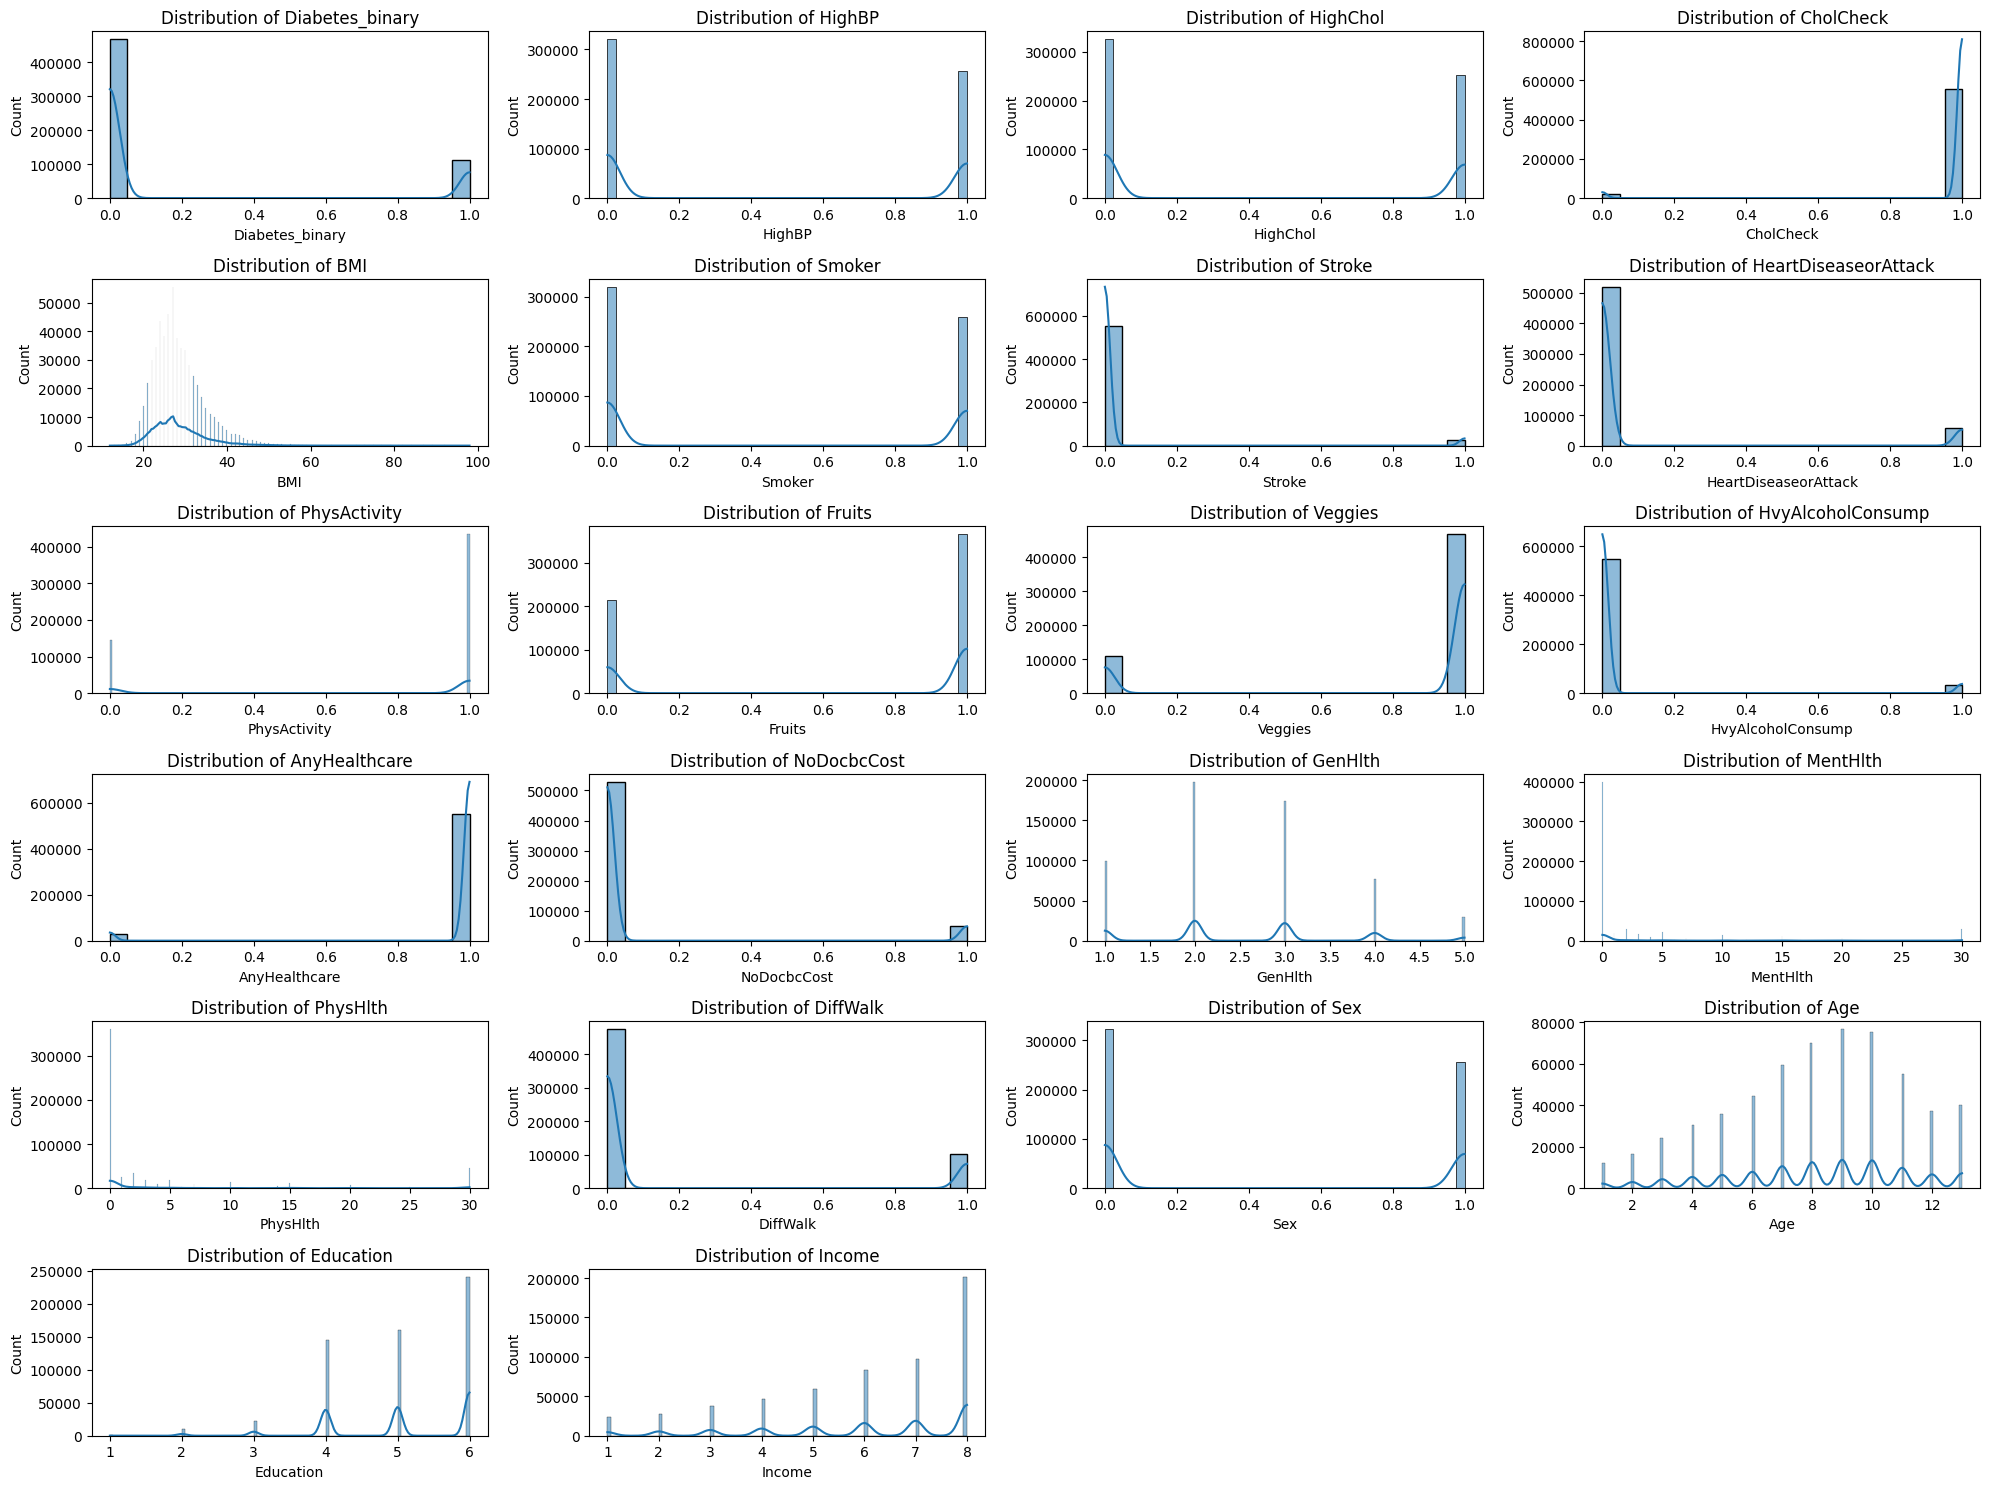

In [20]:
# Plot the distribution of each feature
def plot_feature_distributions(merged_df):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(merged_df.columns, 1):
        plt.subplot(6, 4, i)
        sns.histplot(merged_df[column], kde=True)
        plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

plot_feature_distributions(merged_df)

# III. DATA PREPROCESSING

## 3.1 Grouping value

### 3.1.1 BMI

0: underweight <18.5
1: normal 18.5-24.9
2: overweight 25-29.9
3: obesity I 30-34.9
4: obesity II 35-39.9
5: obesity III/morbid obesity 40-49.9
6: super obesity >=50

reference:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2864630/
https://www.ncbi.nlm.nih.gov/books/NBK279167/
https://link.springer.com/article/10.1007/s00592-013-0460-3

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC11015102/#:~:text=Conversely%2C%20both%20depression%20and%20schizophrenia,obesity%20and%20elevated%20cholesterol%20levels.

In [21]:
categorized_df = merged_df.copy()

In [22]:
# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif 18.5 <= bmi <= 24.9:
        return 1  # Normal
    elif 25 <= bmi <= 29.9:
        return 2  # Overweight
    elif 30 <= bmi <= 34.9:
        return 3  # Obesity I
    elif 35 <= bmi <= 39.9:
        return 4  # Obesity II
    elif 40 <= bmi <= 49.9:
        return 5  # Obesity III/morbid obesity
    else:
        return 6  # Super obesity

# Apply the function to create a new column
categorized_df['BMICategory'] = categorized_df['BMI'].apply(categorize_bmi)


### 3.1.2 Mental Health

Excellent Mental Health (0-1 days): Very few days of poor mental health, indicating a generally excellent state of mental well-being.
Good Mental Health (2-7 days): A small number of days with poor mental health, suggesting overall good mental health with occasional issues.
Fair Mental Health (8-14 days): More frequent days of poor mental health, indicating moderate mental health challenges.
Poor Mental Health (15-21 days): A significant number of days with poor mental health, suggesting considerable mental health issues.
Very Poor Mental Health (22-30 days): Chronic or very frequent poor mental health days, indicating severe mental health problems.

In [23]:
# Define a function to categorize mental health
def categorize_mental_health(days_not_good):
    if days_not_good <= 1:
        return 4 # 'Excellent Mental Health (0-1)'
    elif 2 <= days_not_good <= 7:
        return 3 # 'Good Mental Health (2-7)'
    elif 8 <= days_not_good <= 14:
        return 2 #'Fair Mental Health (8-14)'
    elif 15 <= days_not_good <= 21:
        return 1 #'Poor Mental Health (15-21)'
    else:
        return 0 #'Very Poor Mental Health (22-31)'

# Apply the function to create a new column
categorized_df['MentalHealthCategory'] = categorized_df['MentHlth'].apply(categorize_mental_health)

### 3.1.3 Physical Health

In [24]:
# Define a function to categorize physical health
def categorize_physical_health(days_not_good):
    if days_not_good <= 1:
        return 4 # 'Excellent Physical Health'
    elif 2 <= days_not_good <= 7:
        return 3 #'Good Physical Health'
    elif 8 <= days_not_good <= 14:
        return 2 #'Fair Physical Health'
    elif 15 <= days_not_good <= 21:
        return 1 #'Poor Physical Health'
    else:
        return 0 #'Very Poor Physical Health'

# Apply the function to create a new column
categorized_df['PhysicalHealthCategory'] = categorized_df['PhysHlth'].apply(categorize_physical_health)


In [25]:
categorized_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMICategory,MentalHealthCategory,PhysicalHealthCategory
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,18.0,15.0,1.0,0.0,9.0,4.0,3.0,5,1,1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,7.0,6.0,1.0,2,4,4
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,30.0,30.0,1.0,0.0,9.0,4.0,8.0,2,0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,11.0,3.0,6.0,2,4,4
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1,3,4


In [26]:
categorized_df = categorized_df.drop(columns=['MentHlth', 'PhysHlth'])

In [27]:
categorized_df = categorized_df.astype(int)

In [28]:
categorized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578052 entries, 0 to 578051
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Diabetes_binary         578052 non-null  int64
 1   HighBP                  578052 non-null  int64
 2   HighChol                578052 non-null  int64
 3   CholCheck               578052 non-null  int64
 4   BMI                     578052 non-null  int64
 5   Smoker                  578052 non-null  int64
 6   Stroke                  578052 non-null  int64
 7   HeartDiseaseorAttack    578052 non-null  int64
 8   PhysActivity            578052 non-null  int64
 9   Fruits                  578052 non-null  int64
 10  Veggies                 578052 non-null  int64
 11  HvyAlcoholConsump       578052 non-null  int64
 12  AnyHealthcare           578052 non-null  int64
 13  NoDocbcCost             578052 non-null  int64
 14  GenHlth                 578052 non-null  int64
 15  

###  3.1.4 Age

In [29]:
age_category_mapping = {
    1: 1, # "Young Adult",  # 18 to 24
    2: 1, # "Young Adult",  # 25 to 29
    3: 1, # "Young Adult",  # 30 to 34
    4: 2, # "Middle-aged Adult",  # 35 to 39
    5: 2, # "Middle-aged Adult",  # 40 to 44
    6: 2, # "Middle-aged Adult",  # 45 to 49
    7: 2, # "Middle-aged Adult",  # 50 to 54
    8: 2, #"Middle-aged Adult",  # 55 to 59
    9: 2, #"Middle-aged Adult",  # 60 to 64
    10: 3, #"Elderly",  # 65 to 69
    11: 3, #"Elderly",  # 70 to 74
    12: 3, #"Elderly",  # 75 to 79
    13: 3 #"Elderly"  # 80 or older
}

# Apply the mapping to create a new column for age categories
categorized_df['AgeCategory'] = categorized_df['Age'].map(age_category_mapping)

# Display the DataFrame to check the new column
categorized_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,DiffWalk,Sex,Age,Education,Income,BMICategory,MentalHealthCategory,PhysicalHealthCategory,AgeCategory
0,0,1,1,1,40,1,0,0,0,0,...,5,1,0,9,4,3,5,1,1,2
1,0,0,0,0,25,1,0,0,1,0,...,3,0,0,7,6,1,2,4,4,2
2,0,1,1,1,28,0,0,0,0,1,...,5,1,0,9,4,8,2,0,0,2
3,0,1,0,1,27,0,0,0,1,1,...,2,0,0,11,3,6,2,4,4,3
4,0,1,1,1,24,0,0,0,1,1,...,2,0,0,11,5,4,1,3,4,3


## 3.2 Standardize data

In [31]:
# Assuming df is your DataFrame
bmi_values = categorized_df[['BMI']].values
scaler = StandardScaler()
bmi_standardized = scaler.fit_transform(bmi_values)

# Create a new DataFrame for the standardized BMI
df_bmi_standardized = pd.DataFrame(bmi_standardized, columns=['BMI_Standardized'])

In [32]:
# Drop the original BMI column and concatenate the standardized BMI column
df_categorical = categorized_df.drop(columns=['BMI'])
df_standard = pd.concat([df_categorical, df_bmi_standardized], axis=1)

In [33]:
df_standard.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,DiffWalk,Sex,Age,Education,Income,BMICategory,MentalHealthCategory,PhysicalHealthCategory,AgeCategory,BMI_Standardized
0,0,1,1,1,1,0,0,0,0,1,...,1,0,9,4,3,5,1,1,2,1.709615
1,0,0,0,0,1,0,0,1,0,0,...,0,0,7,6,1,2,4,4,2,-0.532542
2,0,1,1,1,0,0,0,0,1,0,...,1,0,9,4,8,2,0,0,2,-0.084111
3,0,1,0,1,0,0,0,1,1,1,...,0,0,11,3,6,2,4,4,3,-0.233588
4,0,1,1,1,0,0,0,1,1,1,...,0,0,11,5,4,1,3,4,3,-0.682019


In [34]:
df_standard.isnull().sum()

Diabetes_binary           0
HighBP                    0
HighChol                  0
CholCheck                 0
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   0
DiffWalk                  0
Sex                       0
Age                       0
Education                 0
Income                    0
BMICategory               0
MentalHealthCategory      0
PhysicalHealthCategory    0
AgeCategory               0
BMI_Standardized          0
dtype: int64

## 3.3 Make separated dfs

In [35]:
# Filter data for Diabetes_binary = 1
df_diabetes_1 = df_standard[df_standard['Diabetes_binary'] == 1]

# Filtering for df_female_age_1
df_female_age_1 = df_diabetes_1[(df_diabetes_1['Sex'] == 0) & (df_diabetes_1['AgeCategory'] == 1)]

# Filtering for df_female_age_2
df_female_age_2 = df_diabetes_1[(df_diabetes_1['Sex'] == 0) & (df_diabetes_1['AgeCategory'] == 2)]

# Filtering for df_female_age_3
df_female_age_3 = df_diabetes_1[(df_diabetes_1['Sex'] == 0) & (df_diabetes_1['AgeCategory'] == 3)]

# Filtering for df_male_age_1
df_male_age_1 = df_diabetes_1[(df_diabetes_1['Sex'] == 1) & (df_diabetes_1['AgeCategory'] == 1)]

# Filtering for df_male_age_2
df_male_age_2 = df_diabetes_1[(df_diabetes_1['Sex'] == 1) & (df_diabetes_1['AgeCategory'] == 2)]

# Filtering for df_male_age_3
df_male_age_3 = df_diabetes_1[(df_diabetes_1['Sex'] == 1) & (df_diabetes_1['AgeCategory'] == 3)]

# IV. MODELING

## 4.1 Persona Profiling

In [37]:
# Create general personas for males and females
general_male_persona = df_diabetes_1[df_diabetes_1['Sex'] == 1].median().to_frame().transpose()
general_female_persona = df_diabetes_1[df_diabetes_1['Sex'] == 0].median().to_frame().transpose()

# Create personas for each age category (Young Adult, Middle-aged Adult, Elderly)
age_categories = df_diabetes_1['AgeCategory'].unique()
age_category_personas = []

for age_cat in age_categories:
    for sex in [0, 1]:  # 0 for Female, 1 for Male
        persona_name = f"{'Male' if sex == 1 else 'Female'}, Age Category {age_cat}"
        filtered_data = df_diabetes_1[(df_diabetes_1['Sex'] == sex) & (df_diabetes_1['AgeCategory'] == age_cat)]
        persona_data = filtered_data.median().to_frame().transpose()
        persona_data['Persona'] = persona_name
        age_category_personas.append(persona_data)

# Combine all personas into a single DataFrame
personas_df = pd.concat(age_category_personas, ignore_index=True)

In [38]:
# Display personas DataFrame
print("General Male Persona:")
general_male_persona

General Male Persona:


,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,DiffWalk,Sex,Age,Education,Income,BMICategory,MentalHealthCategory,PhysicalHealthCategory,AgeCategory,BMI_Standardized
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,10.0,5.0,6.0,3.0,4.0,4.0,3.0,0.214843


In [39]:
print("\nGeneral Female Persona:")
general_female_persona


General Female Persona:


,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,DiffWalk,Sex,Age,Education,Income,BMICategory,MentalHealthCategory,PhysicalHealthCategory,AgeCategory,BMI_Standardized
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,10.0,5.0,5.0,3.0,4.0,3.0,3.0,0.364321


In [40]:
print("\nAge Category Personas:")
personas_df


Age Category Personas:


,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Sex,Age,Education,Income,BMICategory,MentalHealthCategory,PhysicalHealthCategory,AgeCategory,BMI_Standardized,Persona
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,8.0,5.0,5.0,3.0,4.0,3.0,2.0,0.663275,"Female, Age Category 2"
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,8.0,5.0,6.0,3.0,4.0,4.0,2.0,0.364321,"Male, Age Category 2"
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,11.0,5.0,5.0,3.0,4.0,3.0,3.0,0.214843,"Female, Age Category 3"
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,11.0,5.0,6.0,2.0,4.0,4.0,3.0,0.065366,"Male, Age Category 3"
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,5.0,5.0,3.0,3.0,3.0,1.0,0.663275,"Female, Age Category 1"
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,3.0,5.0,6.0,3.0,4.0,4.0,1.0,0.214843,"Male, Age Category 1"


## 4.2 Prediction model

In [41]:
# Separate majority and minority classes
df_majority = df_standard[df_standard.Diabetes_binary == 0.0]
df_minority = df_standard[df_standard.Diabetes_binary == 1.0]

# Undersample the majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority),  # to match minority class
                                    random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
undersampled_data = pd.concat([df_majority_undersampled, df_minority])

In [42]:
undersampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221338 entries, 112305 to 578051
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Diabetes_binary         221338 non-null  int64  
 1   HighBP                  221338 non-null  int64  
 2   HighChol                221338 non-null  int64  
 3   CholCheck               221338 non-null  int64  
 4   Smoker                  221338 non-null  int64  
 5   Stroke                  221338 non-null  int64  
 6   HeartDiseaseorAttack    221338 non-null  int64  
 7   PhysActivity            221338 non-null  int64  
 8   Fruits                  221338 non-null  int64  
 9   Veggies                 221338 non-null  int64  
 10  HvyAlcoholConsump       221338 non-null  int64  
 11  AnyHealthcare           221338 non-null  int64  
 12  NoDocbcCost             221338 non-null  int64  
 13  GenHlth                 221338 non-null  int64  
 14  DiffWalk            

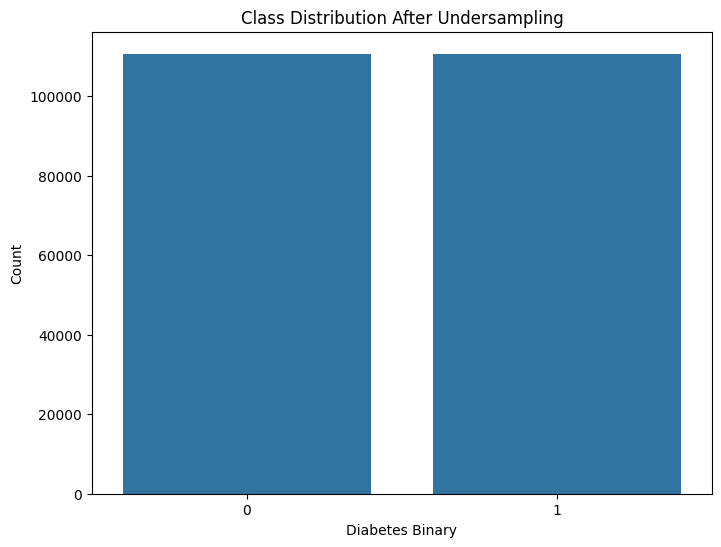

In [43]:
# Bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=undersampled_data)
plt.title('Class Distribution After Undersampling')
plt.xlabel('Diabetes Binary')
plt.ylabel('Count')
plt.show()

In [44]:
# Identify numerical columns
numerical_columns = undersampled_data.select_dtypes(include=['int64']).columns
print("Numerical columns:", numerical_columns)

# Define a function to perform K-S test
def kolmogorov_smirnov_test(column):
    stat, p_value = kstest(undersampled_data[column], 'norm', args=(undersampled_data[column].mean(), categorized_df[column].std()))
    return stat, p_value

# Apply K-S test to each numerical column
results = {col: kolmogorov_smirnov_test(col) for col in numerical_columns}

# Print the results
for column, (stat, p_value) in results.items():
    print(f'Column: {column} | K-S Statistic: {stat:.4f} | p-value: {p_value:.4f}')
    if p_value > 0.05:
        print(f'{column} looks normally distributed (fail to reject H0)\n')
    else:
        print(f'{column} does not look normally distributed (reject H0)\n')


Numerical columns: Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMICategory',
       'MentalHealthCategory', 'PhysicalHealthCategory', 'AgeCategory'],
      dtype='object')
Column: Diabetes_binary | K-S Statistic: 0.3981 | p-value: 0.0000
Diabetes_binary does not look normally distributed (reject H0)

Column: HighBP | K-S Statistic: 0.3723 | p-value: 0.0000
HighBP does not look normally distributed (reject H0)

Column: HighChol | K-S Statistic: 0.3559 | p-value: 0.0000
HighChol does not look normally distributed (reject H0)

Column: CholCheck | K-S Statistic: 0.5288 | p-value: 0.0000
CholCheck does not look normally distributed (reject H0)

Column: Smoker | K-S Statistic: 0.3560 | p-value: 0.0000
Smoker does not look normally distributed (reject H0)

Column:

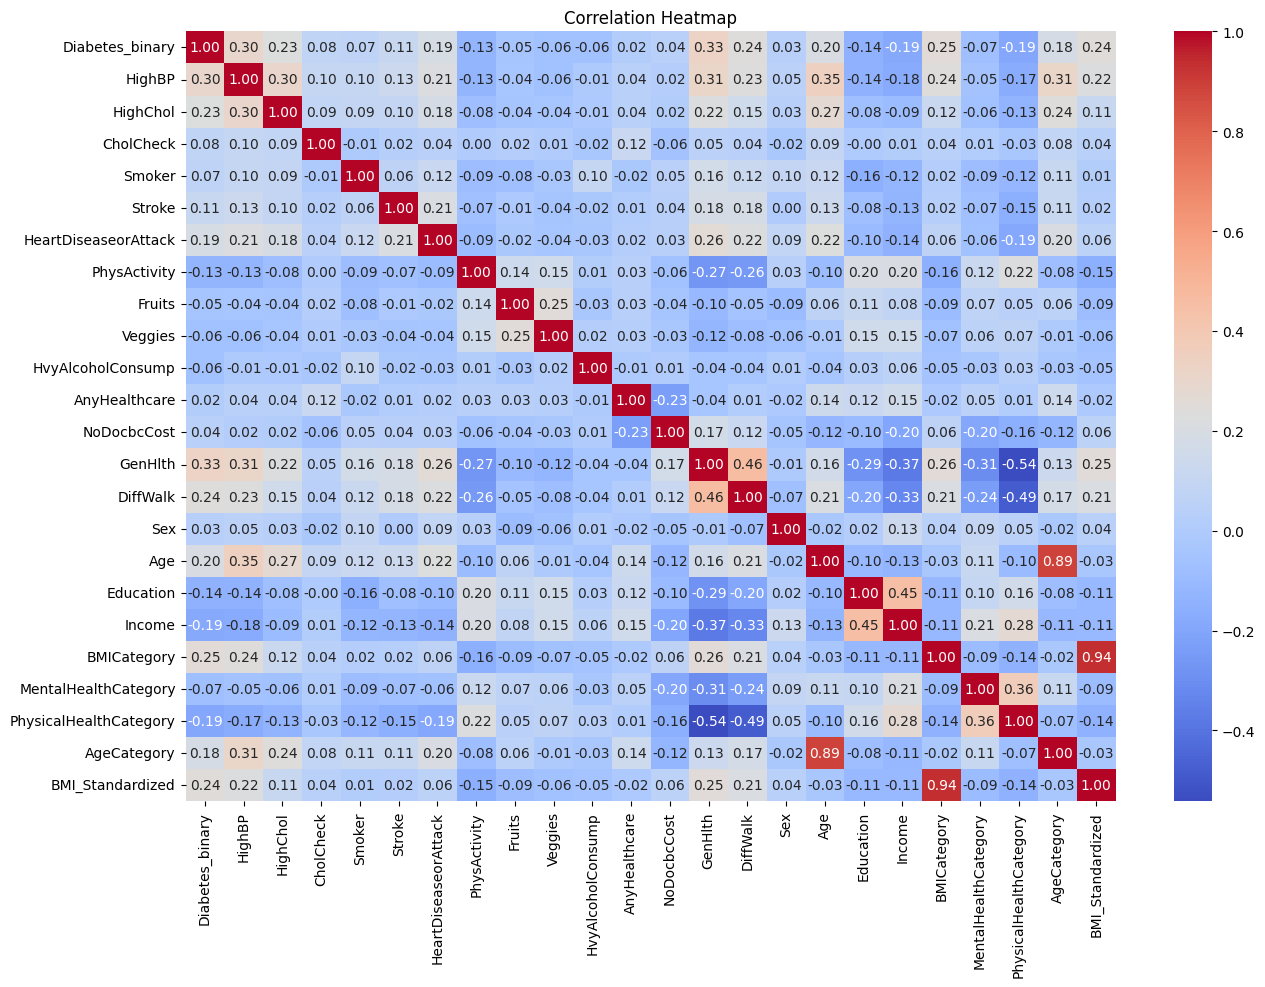

In [45]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
corr = df_standard.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


In [46]:
# Drop liniear features
df_model = df_standard.drop(columns=['BMI_Standardized', 'AgeCategory'])

In [50]:
df_model.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,BMICategory,MentalHealthCategory,PhysicalHealthCategory
0,0,1,1,1,1,0,0,0,0,1,...,0,5,1,0,9,4,3,5,1,1
1,0,0,0,0,1,0,0,1,0,0,...,1,3,0,0,7,6,1,2,4,4
2,0,1,1,1,0,0,0,0,1,0,...,1,5,1,0,9,4,8,2,0,0
3,0,1,0,1,0,0,0,1,1,1,...,0,2,0,0,11,3,6,2,4,4
4,0,1,1,1,0,0,0,1,1,1,...,0,2,0,0,11,5,4,1,3,4


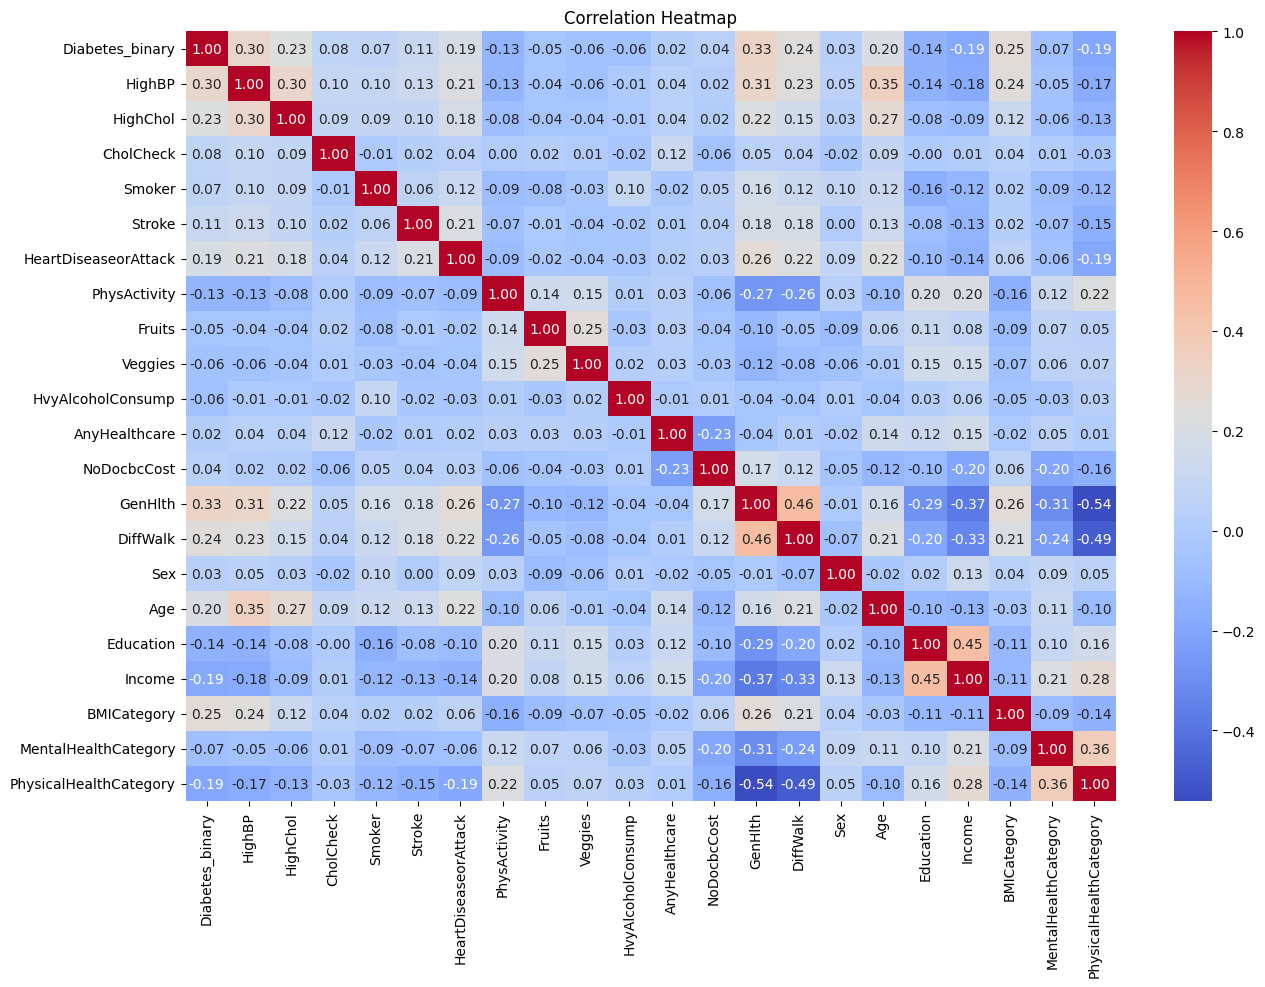

In [47]:
# Correlation heatmap after dropping some features
plt.figure(figsize=(15, 10))
corr = df_model.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [48]:
# Split the data into features and target
X = df_model.drop(columns=['Diabetes_binary'])
y = df_model['Diabetes_binary']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
# Choose a model - Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9502
Precision: 0.8866
Recall: 0.8482
F1 Score: 0.8669
ROC AUC Score: 0.9694


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train logistic regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

# Initialize and train gradient boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")


Logistic Regression Accuracy: 0.8241
Gradient Boosting Accuracy: 0.8272


# V. EVALUATION

In [ ]:
# # Perform 5-fold cross-validation
# cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
# print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

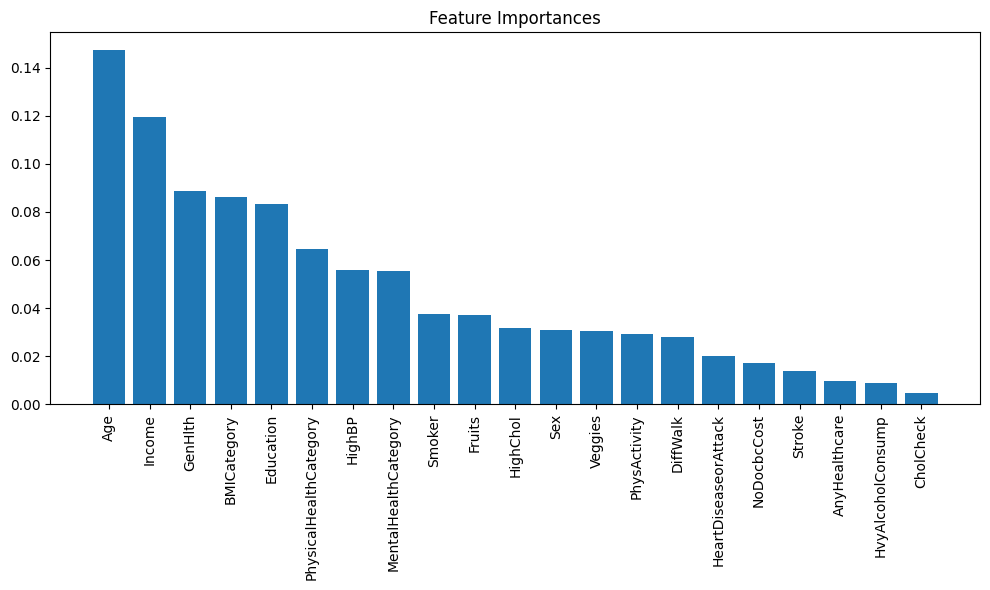

In [54]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [57]:
def create_persona_profile(persona, gender):
    gender_str = "Male" if gender == 1 else "Female"
    
    age_category_mapping = {
        1: "Young Adult",
        2: "Middle-aged Adult",
        3: "Elderly"
    }
    
    age_str = age_category_mapping[int(persona['AgeCategory'])]
    bmi_category = int(persona['BMICategory'])
    mental_health = int(persona['MentalHealthCategory'])
    physical_health = int(persona['PhysicalHealthCategory'])
    diff_walk = "has difficulty walking" if int(persona['DiffWalk']) == 1 else "does not have difficulty walking"
    
    profile = f"""
    Meet {gender_str} persona:
    - Age: {age_str}
    - BMI Category: {bmi_category}
    - This person {diff_walk} and has mental health category {mental_health} and physical health category {physical_health}.
    - This persona has {'diabetes' if int(persona['Diabetes_binary']) == 1 else 'no diabetes'}, 
      {'high blood pressure' if int(persona['HighBP']) == 1 else 'normal blood pressure'},
      {'high cholesterol' if int(persona['HighChol']) == 1 else 'normal cholesterol'},
      {'a history of heart disease or attack' if int(persona['HeartDiseaseorAttack']) == 1 else 'no history of heart disease or attack'},
      {'and is a smoker' if int(persona['Smoker']) == 1 else 'and is not a smoker'}.
    - This person {'is physically active' if int(persona['PhysActivity']) == 1 else 'is not physically active'},
      {'consumes fruits and vegetables regularly' if int(persona['Fruits']) == 1 and int(persona['Veggies']) == 1 else 'does not consume fruits and vegetables regularly'},
      and {'has heavy alcohol consumption' if int(persona['HvyAlcoholConsump']) == 1 else 'does not have heavy alcohol consumption'}.
    - They {'have access to healthcare' if int(persona['AnyHealthcare']) == 1 else 'do not have access to healthcare'}.
    - Education level: {int(persona['Education'])} (higher number indicates higher education level)
    - Income level: {int(persona['Income'])} (higher number indicates higher income level)
    """
    return profile

# Example usage:
import pandas as pd

# Assuming 'categorized_df' is your DataFrame containing persona data
# Replace this with your actual DataFrame containing persona data
categorized_df = pd.DataFrame({
    'Diabetes_binary': [1.0],
    'HighBP': [1.0],
    'HighChol': [1.0],
    'CholCheck': [1.0],
    'Smoker': [1.0],
    'Stroke': [0.0],
    'HeartDiseaseorAttack': [0.0],
    'PhysActivity': [1.0],
    'Fruits': [1.0],
    'Veggies': [1.0],
    'HvyAlcoholConsump': [0.0],
    'AnyHealthcare': [1.0],
    'MentalHealthCategory': [4.0],
    'PhysicalHealthCategory': [4.0],
    'DiffWalk': [0.0],
    'Sex': [1.0],
    'Age': [10.0],
    'Education': [5.0],
    'Income': [6.0],
    'BMICategory': [3.0],
    'AgeCategory': [3.0],
    'BMI_Standardized': [0.214843]
})

# Generate profile for a male persona
male_profile = create_persona_profile(categorized_df.iloc[0], gender=1)
print("Male Persona Profile:")
print(male_profile)

# Generate profile for a female persona
female_profile = create_persona_profile(categorized_df.iloc[0], gender=0)
print("\nFemale Persona Profile:")
print(female_profile)

Male Persona Profile:

    Meet Male persona:
    - Age: Elderly
    - BMI Category: 3
    - This person does not have difficulty walking and has mental health category 4 and physical health category 4.
    - This persona has diabetes, 
      high blood pressure,
      high cholesterol,
      no history of heart disease or attack,
      and is a smoker.
    - This person is physically active,
      consumes fruits and vegetables regularly,
      and does not have heavy alcohol consumption.
    - They have access to healthcare.
    - Education level: 5 (higher number indicates higher education level)
    - Income level: 6 (higher number indicates higher income level)
    

Female Persona Profile:

    Meet Female persona:
    - Age: Elderly
    - BMI Category: 3
    - This person does not have difficulty walking and has mental health category 4 and physical health category 4.
    - This persona has diabetes, 
      high blood pressure,
      high cholesterol,
      no history of heart d

In [58]:
for index, row in personas_df.iterrows():
    persona_profile = create_persona_profile(row, row['Sex']) 
    print(f"Persona Profile {index + 1}:")
    print(persona_profile)
    print("\n")

Persona Profile 1:

    Meet Female persona:
    - Age: Middle-aged Adult
    - BMI Category: 3
    - This person does not have difficulty walking and has mental health category 4 and physical health category 3.
    - This persona has diabetes, 
      high blood pressure,
      high cholesterol,
      no history of heart disease or attack,
      and is not a smoker.
    - This person is physically active,
      consumes fruits and vegetables regularly,
      and does not have heavy alcohol consumption.
    - They have access to healthcare.
    - Education level: 5 (higher number indicates higher education level)
    - Income level: 5 (higher number indicates higher income level)
    


Persona Profile 2:

    Meet Male persona:
    - Age: Middle-aged Adult
    - BMI Category: 3
    - This person does not have difficulty walking and has mental health category 4 and physical health category 4.
    - This persona has diabetes, 
      high blood pressure,
      high cholesterol,
      no h

In [59]:
# Save the model
dump(rf_model, 'trained_rf_model.joblib')

# Load the saved model
loaded_model = load('trained_rf_model.joblib')

In [60]:
# Download dfs for data collection
categorized_df.to_csv('categorized_df.csv', index=False)
general_male_persona.to_csv('general_male_persona.csv', index=False)
general_female_persona.to_csv('general_female_persona.csv', index=False)
personas_df.to_csv('personas_df.csv', index=False)